In [1]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy import pi
from pathlib import Path
import numpy as np
import matplotlib as mpl
from scipy.special import jv

colourbar_pad=0.1
colourbar_size_percentage=5
cm_unit = 1/2.54
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
save_dir =  Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"



In [2]:
fontsize = 18
PlotParams(fontsize=fontsize, serif_font = "Computer Modern Roman")
figsize_ham_ss=(5.1,5.1)
num_sites = 9
axes_tick_pos=np.array([0,2,4,6,8])

# axes_tick_labels=[f"${i}$" for i in axes_tick_pos+np.array([1])] 
axes_tick_labels = axes_tick_pos+np.array([1])
xlabel_coords = [0.54,-0.07]
ylabel_coords = [-0.15,0.5]

bbox_colourbar_anchor = (0.9, 0.57, 1, 0.73)

### Single Site Shake


In [3]:
#SSS

centres = np.array([4])
funcs = [Cosine]
a_val = 90
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0

params = [[a_val, omega0, phi0, onsite0]]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 
sss_plot_dir_path = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_single_site_shake.pdf"
sss_plot_dir_path_png = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_single_site_shake.png"
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)


data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_ham_ss[0]*cm_unit, figsize_ham_ss[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)
  
ax.set_title("$[H_S^{t_0}]_{i,j}/J$", y=1.02)

ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)


new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(sss_plot_dir_path, format="pdf", bbox_inches="tight", pad_inches=0)
fig.savefig(sss_plot_dir_path_png, format="png", bbox_inches="tight", pad_inches=0.005, dpi=300)
plt.show()




#### log scale


In [4]:
# centres = np.array([5])
# funcs = [Cosine]
# a_val = 90
# omega0 = 25; T = 2*pi/omega0
# phi0 = 0
# onsite0 =0
# params = [[a_val, omega0, phi0, onsite0]]
# _, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
# sss_log_plot_dir= Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_single_site_shake_log.pdf"
# sss_log_plot_dir_png= Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_single_site_shake_log.png"

# colourbar_min = np.min(np.real(HF))
# colourbar_max = np.max(np.real(HF))
# print(colourbar_max, colourbar_min)

# axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
# data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,1); colourbar_ticks = [-1,-0.1,0,0.1,1]

# linthresh = 1e-1
# norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=-1.0, vmax=1.0, base=10)

# fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
# pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
# ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
#         labeltop=False, direction = "in", length = 3, pad=2)  
# ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
#         labelright=False, direction = "in", length = 3, pad=2)  

# ax.set_title("$[H_S^{t_0}]_{i,j}/J$", y=1.02)

# ax.set_ylabel('$i$', rotation=0)
# ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
# ax.set_yticks(axes_tick_pos)
# ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

# ax.set_xlabel("$j$", fontsize=fontsize)
# ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
# ax.set_xticks(axes_tick_pos)
# ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

# new_norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1], base=10)
# new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
# axins = inset_axes(
#     ax,
#     width="5%",  # width: 5% of parent_bbox width
#     height="50%",  # height: 50%
#     loc="lower left",
#     bbox_to_anchor=bbox_colourbar_anchor,
#     bbox_transform=ax.transAxes,
#     borderpad=0,
# )
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
# cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

# fig.savefig(sss_log_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
# fig.savefig(sss_log_plot_dir_png, format="png", bbox_inches="tight", pad_inches=0, dpi=300)

# plt.show()




### SSH

In [5]:
# #SSH
# centres = np.array(range(num_sites))
# funcs = [Cosine]*num_sites
# a1 = 39; a2 = 38
# omega0 = 25; T = 2*pi/omega0
# phi1 = 0; onsite0 = 0
# params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, -a1, -a2]]*5)[:num_sites]
# _, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)


# ssh_plot_dir = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_ssh.pdf"
# ssh_plot_dir_png = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_ssh.png"


# colourbar_min = np.min(np.real(HF))
# colourbar_max = np.max(np.real(HF))
# print(colourbar_max, colourbar_min)

# axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
# data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)
# norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

# fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
# pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
# ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
#         labeltop=False, direction = "in", length = 3, pad=2)  
# ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
#         labelright=False, direction = "in", length = 3, pad=2)  
# ax.set_title("$[H_S^{t_0}]_{i,j}/J$", y=1.02)

# ax.set_ylabel('$i$', rotation=0)
# ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
# ax.set_yticks(axes_tick_pos)
# ax.set_yticklabels(axes_tick_labels)

# ax.set_xlabel("$j$")
# ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
# ax.set_xticks(axes_tick_pos)
# ax.set_xticklabels(axes_tick_labels)

# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
# new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
# axins = inset_axes(
#     ax,
#     width="5%",  # width: 5% of parent_bbox width
#     height="50%",  # height: 50%
#     loc="lower left",
#     bbox_to_anchor=bbox_colourbar_anchor,
#     bbox_transform=ax.transAxes,
#     borderpad=0,
# )
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
# cbar.ax.tick_params(labelsize=7, pad=0)

# fig.savefig(ssh_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
# fig.savefig(ssh_plot_dir_png, format="png", bbox_inches="tight", pad_inches=0, dpi=300)

# plt.show()

In [8]:
figsize_hams=(9.1,9.1)
fontsize = 26
PlotParams(fontsize=fontsize, mathtext_font="dejavusans")
num_sites = 11
axes_tick_pos=np.array([0,2,4,6,8,10])

# axes_tick_labels=[f"${i}$" for i in axes_tick_pos+np.array([1])] 
axes_tick_labels = axes_tick_pos+np.array([1])

xlabel_coords = [0.51,-0.07]
ylabel_coords = [-0.11,0.5]

bbox_colourbar_anchor = (0.9, 0.57, 1, 0.76)
colourbar_pad=0.1
colourbar_size_percentage=5
cm_unit = 1/2.54
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)


### SSH3

0.3982707 -0.3943039


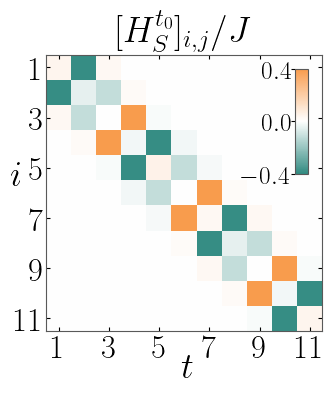

In [10]:
#SSH3 v2
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = -40; a2 = 2.5; a3=-52
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, a3, -a1, -a2, -a3]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 
ssh3_plot_dir = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_ssh3.pdf"
ssh3_plot_dir_png = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_ssh3.png"


colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-0.5 ,0.5); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.5,0.4)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel('$i$', rotation=0, fontsize=fontsize)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$t$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)
ax.set_title("$[H_S^{t_0}]_{i,j}/J$", y=1.02)
new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

# fig.savefig(ssh3_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
# fig.savefig(ssh3_plot_dir_png, format="png", bbox_inches="tight", pad_inches=0.01, dpi=300)

plt.show()

### SSH4

In [ ]:
#SSH4
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 16.917322691940058; a2 = -50; a3 = 38.315948852085626; a4 = -10
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0=0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, a3, a4, -a1, -a2, -a3, -a4]]*5)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)


ssh4_plot_dir = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_ssh4.pdf"
ssh4_plot_dir_png = Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"strob_ham_ssh4.png"

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)


axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_title("$[H_S^{t_0}]_{i,j}/J$", y=1.02)
ax.set_ylabel('$i$', rotation=0, fontsize=fontsize)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(ssh4_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
fig.savefig(ssh4_plot_dir_png, format="png", bbox_inches="tight", pad_inches=0.01, dpi=300)

plt.show()




### Bessel

In [ ]:
#bessel
num_sites = 5
centres = [2]
funcs = [Cosine]
omega0 = 10
num_As = 50
As = np.linspace(0,100,num_As)
phi0 = 0
onsite0 =0
hoppings = np.empty(num_As, dtype=np.complex128)
for i, a0 in enumerate(As):
    T = 2*pi/omega0
    params = [[a0, omega0, phi0, onsite0]]
    _, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
    hoppings[i] = HF[2,3]

In [ ]:
fontsize = 18
PlotParams(fontsize=fontsize, serif_font = "Computer Modern Roman")
figsize_ham_ss=(5.1,5.1)
num_sites = 9
axes_tick_pos=np.array([0,2,4,6,8])

axes_tick_labels=[f"${i}$" for i in axes_tick_pos+np.array([1])] 
axes_tick_labels = axes_tick_pos+np.array([1])
xlabel_coords = [0.54,-0.07]
ylabel_coords = [-0.15,0.5]

bbox_colourbar_anchor = (0.9, 0.57, 1, 0.73)

In [ ]:

figsize_rec = figsize_ham_ss
fig, ax = plt.subplots(figsize=(figsize_rec[0]*cm_unit, figsize_rec[1]*cm_unit))
ax.hlines(0,-0.5,11, color="0.9")

ax.plot(As/omega0, jv(0, As/omega0), color='0.5', label=r"from $H_\mathrm{eff}^{(0)}$")
ax.plot(As/omega0,  -np.real(hoppings),':', color="#C30934", label=r"from $H_S^{t_0}$")

ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_xlabel(r"$A/\omega$")
ax.set_ylabel(r"$\frac{J'}{J}$", fontsize=fontsize*1.3, rotation=0)#
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1]-0.08)
# ax.set_xticks(np.arange(0,0.27, 0.05))
ax.set_xlim([0,10])
xticks = [0, 5, 10]
ax.set_xticks(xticks)
ax.set_xticklabels([rf"${i}$" for i in xticks])
ax.set_yticks([0,1])
ax.legend(loc='upper right', bbox_to_anchor=(0.98, 1.0), ncol=1 , fontsize=10)
bessel_plot_dir =  Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"bessel_func_strob.pdf"
bessel_plot_dir_png =  Path().absolute().parent.parent.parent/"figures"/"local_mod_poster"/"bessel_func_strob.png"

fig.savefig(bessel_plot_dir, format="pdf", bbox_inches="tight", pad_inches=0)
fig.savefig(bessel_plot_dir_png, format="png", bbox_inches="tight", pad_inches=0.01, dpi=300)

plt.show()


## blackhole

In [ ]:
# from floquet_simulations.periodic_functions import Cosine
# from floquet_simulations.hamiltonians import CreateHFGeneral
# from floquet_simulations.plot_functions import *
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
# from numpy import pi
# from scipy.special import jv
# import math
# from pathlib import Path
# import matplotlib.pyplot as plt
# figsize_hams=(3.9,3.9)
# fontsize = 9
# PlotParams(fontsize=fontsize)
bh_x_axis_coords = (0.5,-0.1)

In [ ]:
Ndiffs = 10
ymin = -0.35#jv(0, 3.8316) 
tunnellings = np.linspace(-ymin, ymin, Ndiffs) # for linear
tunnellings = tunnellings[::-1]
#get A vals to get the right gradient
omega = 22
# print(gradients)
drive_style = "alternating"

xvals = ComputeAValsFromRequiredGradients(tunnellings)
A_vals = GetAValsFromBesselXVals(xvals, omega, addition_type=drive_style, constant_shift="zero centre") # get actual shaking values
N= len(A_vals)
print(A_vals)

_, HF = CreateHFGeneral(Ndiffs+1,
                        [int(i) for i in list(np.linspace(0,Ndiffs,Ndiffs+1))],
                        [Cosine]*(Ndiffs+1),
                        [[i,omega,0,0] for i in A_vals], #a, omega, phi onsite
                        2*pi/omega,
                        circle_boundary = 0
                        )

#make real
if np.all(np.imag(HF))==0:
    print("Ham is real")
    HF =np.real(HF)

In [ ]:

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit,figsize_hams[1]*cm_unit))
ax.plot(range(N), A_vals, 'x', c="#1565C0", ms = 3)
markerline, stemlines, baseline = ax.stem(range(N),
                                           A_vals, linefmt=':', markerfmt='x',
                                           basefmt=" "
)
stemlines.set_linewidth(1)
stemlines.set_color("0.5")

markerline.set_markersize(6)
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)

ax.set_ylabel(r"$A_j$", rotation=0)

ax.yaxis.set_label_coords(-0.16,0.5)
ax.tick_params(axis='both', which='major', pad=1)

ax.set_xlabel(r"$j$")
ax.xaxis.set_label_coords(bh_x_axis_coords[0], bh_x_axis_coords[1])
xticks = np.arange(0,N,2)
ax.set_xticks(np.arange(0,N,2))
ax.set_xticklabels([rf"${i}$" for i in xticks+np.array([1])])

yticks = [-40,0,40]
ax.set_yticks(yticks)
# save_dir = Path().absolute().parent.parent.parent
fig.savefig(save_dir/"bh_drive_amps.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
fig.savefig(save_dir/"bh_drive_amps.png", format="png", bbox_inches="tight", dpi=300, pad_inches = 0.01)
plt.show()

In [ ]:
# plot gradient
# '#006F63', "#FFFFFF", '#F78320
fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit,figsize_hams[1]*cm_unit))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
x = list(range(0, N-1))
plt.plot(x, tunnellings, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label = "target",
         c="#F78320")

ax.plot(range(N-1), y, 'x', label = r"Floquet", c="#1565C0", ms=6)
ax.yaxis.set_label_coords(-0.11,0.5)
ax.tick_params(axis='both', which='major', pad=0.4)
ax.set_yticks([-0.4,0,0.4])
ax.set_yticklabels([r"$-0.4$", r"$0$", r"$0.4$"])
# ax.set_xlim([-0.1,7.1])
ax.set_xlabel(r"$j$")
ax.xaxis.set_label_coords(bh_x_axis_coords[0], bh_x_axis_coords[1])

ax.set_ylabel(r"$\kappa_{j,j+1}$")
ax.set_ylim([-0.41, 0.41])
xticks = np.arange(0,N-1,2)
ax.set_xticks(xticks)
ax.set_xticklabels([rf"${i}$" for i in xticks+np.array([1])])
fig.savefig(save_dir/"bh_tunnellings.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
fig.savefig(save_dir/"bh_tunnellings.png", format="png", bbox_inches="tight", dpi=300, pad_inches = 0.01)
plt.show()

In [ ]:


colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)


axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 
data_cmap_lims = (-0.4,0.4); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.5,0.4)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])
fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_title("$[H_S^{t_0}]_{i,j}/J$", y=1.02)
ax.set_ylabel('$i$', rotation=0, fontsize=fontsize)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(bh_x_axis_coords[0], bh_x_axis_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels, font="stix", fontsize=fontsize*0.9)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=bbox_colourbar_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=fontsize*0.7, pad=0)

fig.savefig(save_dir/"bh_ham.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
fig.savefig(save_dir/"bh_ham.png", format="png", bbox_inches="tight", pad_inches=0.01, dpi=300)

plt.show()


